In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from phik import phik_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

In [3]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
# Check first rows of data
print(train_data.head())
print(test_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
# Drop Id column
train = train_data.drop('Id', axis=1)

In [8]:
# Check missing values
display(train.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [9]:
# Select numerical and categorical features
train_num = train.select_dtypes("number")
train_cat = train.select_dtypes("object")

In [10]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_num)

In [11]:
scaled_train

array([[ 0.07337496, -0.20803433, -0.20714171, ..., -1.5991111 ,
         0.13877749,  0.34727322],
       [-0.87256276,  0.40989452, -0.09188637, ..., -0.48911005,
        -0.61443862,  0.00728832],
       [ 0.07337496, -0.08444856,  0.07347998, ...,  0.99089135,
         0.13877749,  0.53615372],
       ...,
       [ 0.30985939, -0.16683907, -0.14781027, ..., -0.48911005,
         1.64520971,  1.07761115],
       [-0.87256276, -0.08444856, -0.08016039, ..., -0.8591104 ,
         1.64520971, -0.48852299],
       [-0.87256276,  0.20391824, -0.05811155, ..., -0.1191097 ,
         0.13877749, -0.42084081]])

In [12]:
df = pd.DataFrame(scaled_train, columns=train_num.columns)

In [13]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,-0.288653,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,-0.872563,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,0.722112,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,0.309859,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,-0.288653,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,-0.872563,-0.084449,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,6.092188,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

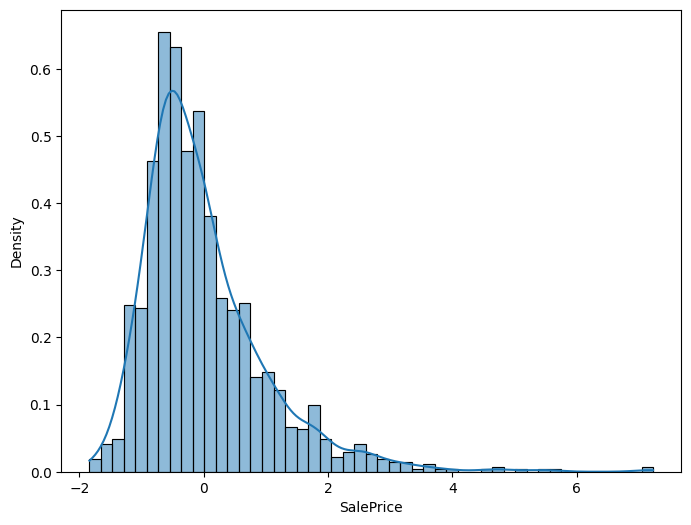

In [14]:
# Visualize distribution of SalePrice
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['SalePrice'], stat="density",kde=True)

In [15]:
# Log transform SalePrice to make it more normally distributed
df['Log_SalePrice'] = np.log1p(df['SalePrice'])

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


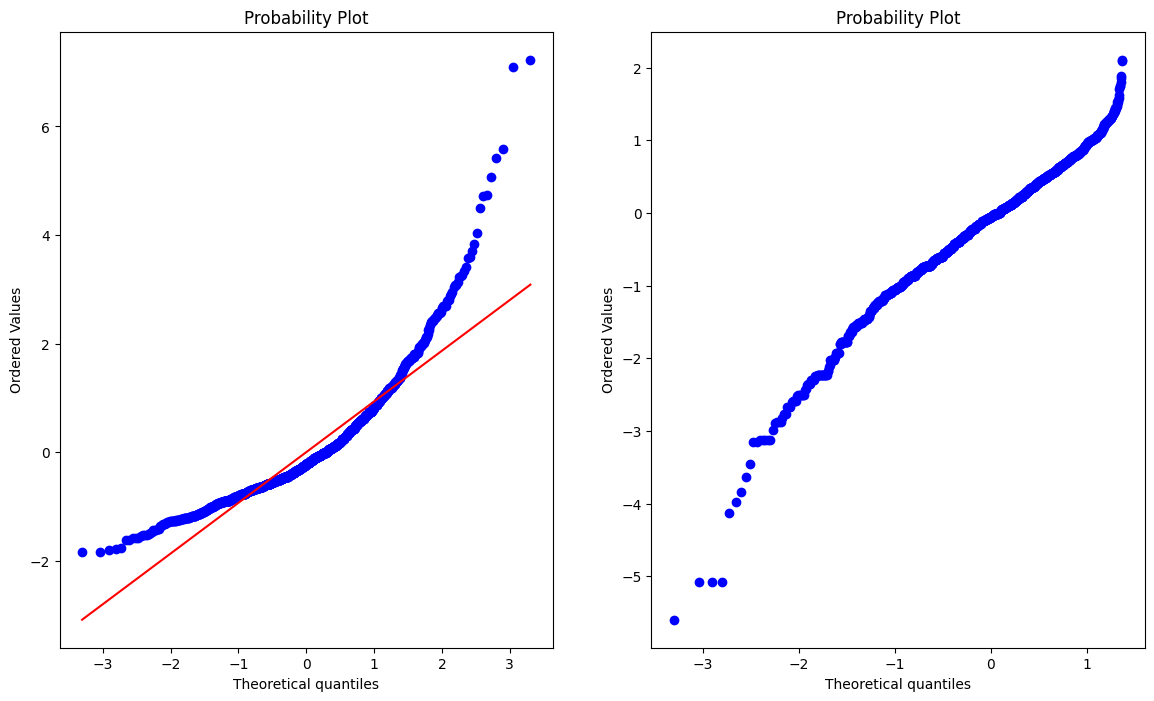

In [16]:
fig = plt.figure(figsize = (14,8))

fig.add_subplot(1,2,1)
res = stats.probplot(df['SalePrice'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(df['Log_SalePrice'], plot=plt)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Log_SalePrice', ylabel='Density'>

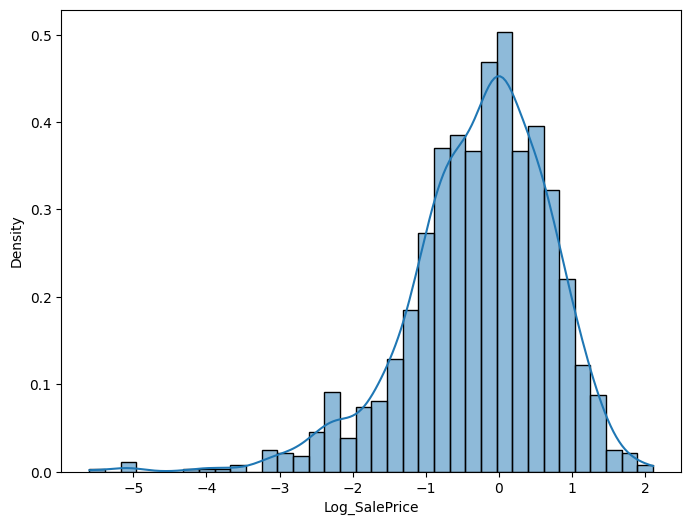

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['Log_SalePrice'], stat="density",kde=True)
# Now the distribution is more normal than before

In [18]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Log_SalePrice
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,0.298083
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,0.007262
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,0.429282
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,-0.724186
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843,0.625854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,-0.288653,...,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560,-0.077486
1456,-0.872563,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,0.722112,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161,0.312005
1457,0.309859,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,-0.288653,...,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611,0.731219
1458,-0.872563,-0.084449,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,6.092188,...,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523,-0.670453


In [19]:
df.drop('SalePrice', axis=1, inplace=True)

In [20]:
# Calculate the correlation matrix
cor_matrix = df.phik_matrix()
cor_matrix

interval columns not set, guessing: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Log_SalePrice']


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Log_SalePrice
MSSubClass,1.000000,0.444429,0.000000,0.389249,0.294822,0.551683,0.462256,0.139751,0.197201,0.066519,...,0.232729,0.196619,0.266302,0.000000,0.025548,0.039937,0.132119,0.034190,0.000000,0.356666
LotFrontage,0.444429,1.000000,0.411916,0.267729,0.063554,0.210505,0.167439,0.291829,0.504822,0.101090,...,0.000000,0.247485,0.359434,0.000000,0.000000,0.496424,0.000000,0.000000,0.010872,0.245656
LotArea,0.000000,0.411916,1.000000,0.039926,0.000000,0.067546,0.099735,0.170092,0.320585,0.250043,...,0.440324,0.079874,0.103785,0.000000,0.000000,0.199338,0.000000,0.000000,0.000000,0.000000
OverallQual,0.389249,0.267729,0.039926,1.000000,0.604310,0.664674,0.594270,0.536692,0.416028,0.000000,...,0.343311,0.288839,0.096853,0.000000,0.000000,0.196484,0.000000,0.185325,0.000000,0.672403
OverallCond,0.294822,0.063554,0.000000,0.604310,1.000000,0.492287,0.347429,0.093901,0.069573,0.000000,...,0.140163,0.158257,0.178268,0.000000,0.016112,0.000000,0.047321,0.056764,0.086411,0.294715
YearBuilt,0.551683,0.210505,0.067546,0.664674,0.492287,1.000000,0.888437,0.291599,0.268852,0.174980,...,0.398480,0.295069,0.454373,0.000000,0.232054,0.000000,0.090715,0.000000,0.000000,0.627263
YearRemodAdd,0.462256,0.167439,0.099735,0.594270,0.347429,0.888437,1.000000,0.184035,0.212003,0.233189,...,0.360582,0.185497,0.245117,0.055823,0.126232,0.129303,0.000000,0.079714,0.000000,0.540080
MasVnrArea,0.139751,0.291829,0.170092,0.536692,0.093901,0.291599,0.184035,1.000000,0.392347,0.000000,...,0.274274,0.143205,0.000000,0.000000,0.196147,0.051428,0.000000,0.000000,0.076474,0.461139
BsmtFinSF1,0.197201,0.504822,0.320585,0.416028,0.069573,0.268852,0.212003,0.392347,1.000000,0.000000,...,0.329456,0.593985,0.022572,0.000000,0.000000,0.496361,0.000000,0.086080,0.000000,0.424535
BsmtFinSF2,0.066519,0.101090,0.250043,0.000000,0.000000,0.174980,0.233189,0.000000,0.000000,1.000000,...,0.147774,0.243795,0.099320,0.000000,0.199406,0.170786,0.089721,0.000000,0.045356,0.000000


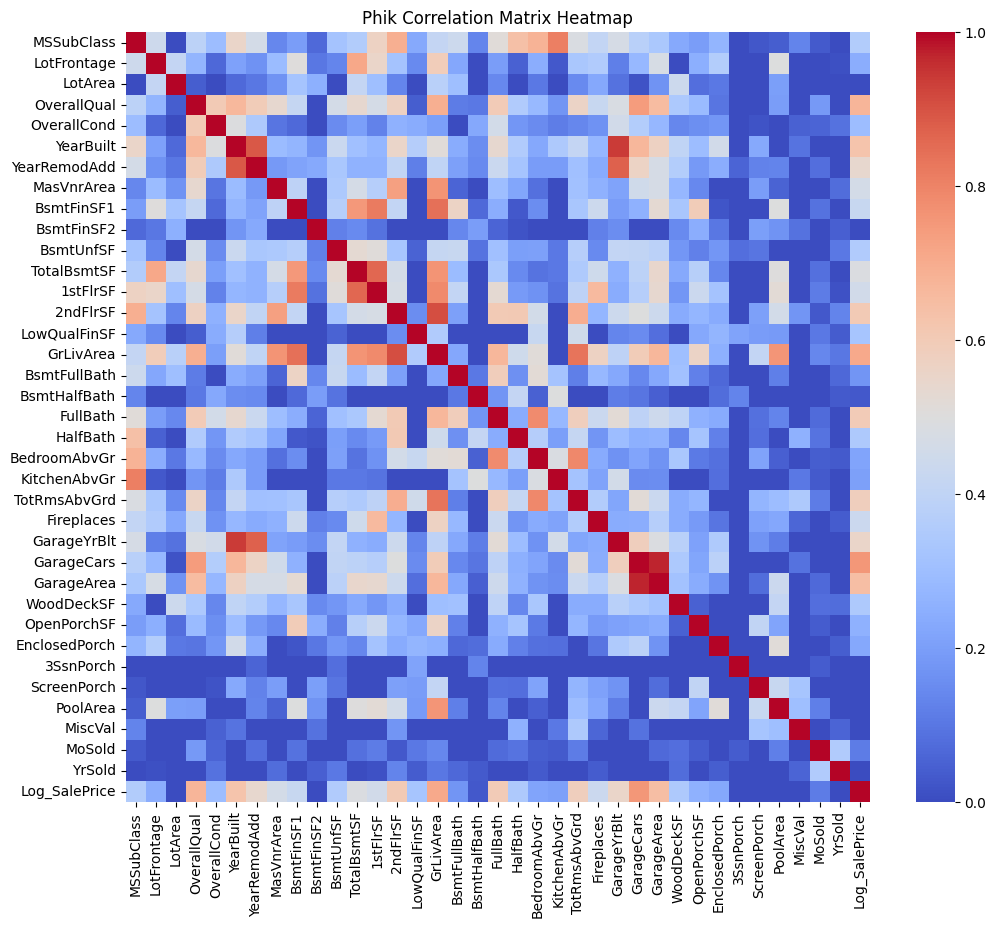

In [21]:
# draw heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Phik Correlation Matrix Heatmap')
plt.show()

In [22]:
# Select features with correlation higher than 0.5
high_corr_features = cor_matrix['Log_SalePrice'][cor_matrix['Log_SalePrice'] > 0.5].index.tolist()


print("The relationships of correlation are higher that 0.5：")
print(high_corr_features)

The relationships of correlation are higher that 0.5：
['OverallQual', 'YearBuilt', 'YearRemodAdd', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Log_SalePrice']


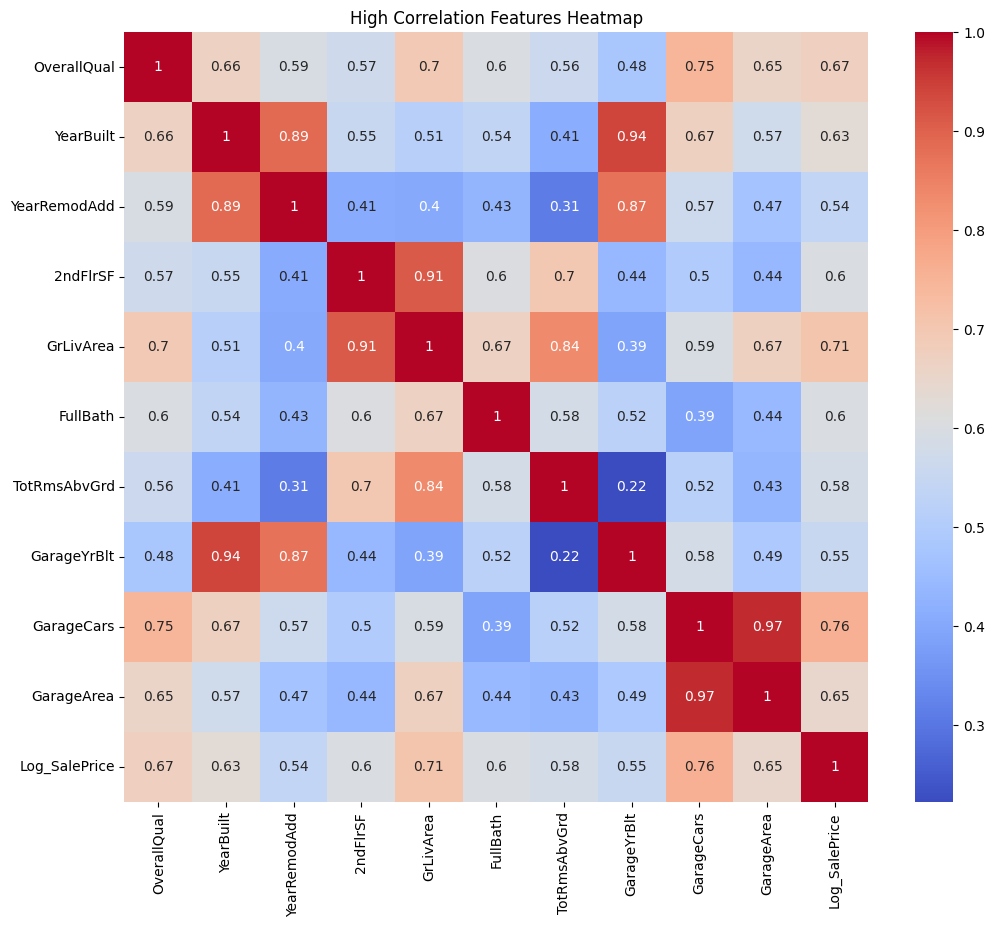

In [23]:
high_corr_matrix = cor_matrix.loc[high_corr_features, high_corr_features]

# draw heatmap for high correlation
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_matrix, cmap='coolwarm', cbar=True, annot=True)
plt.title('High Correlation Features Heatmap')
plt.show()

In [24]:
# Mark the selected feature and target 
features = ["OverallQual", "YearBuilt", "YearRemodAdd", "2ndFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageYrBlt", "GarageCars", "GarageArea"]   
target = "Log_SalePrice"

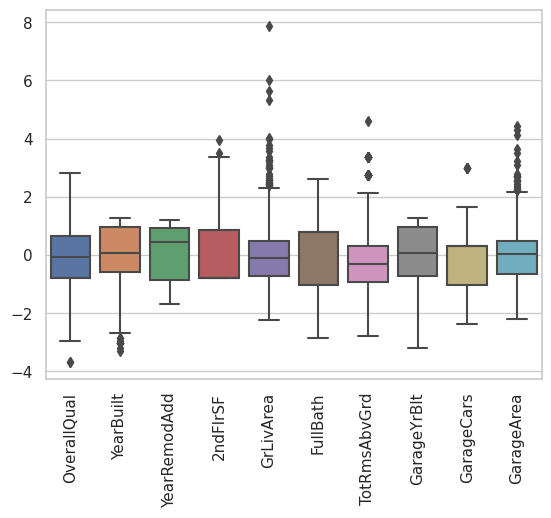

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw boxplot to find outliers 
sns.set(style="whitegrid")
sns.boxplot(df[features])
plt.xticks(rotation="vertical")
plt.show()

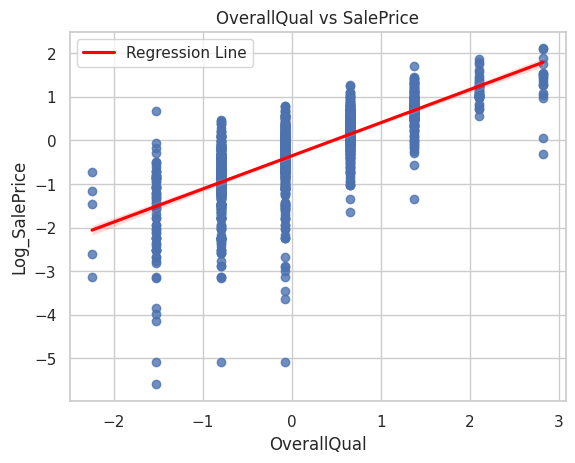

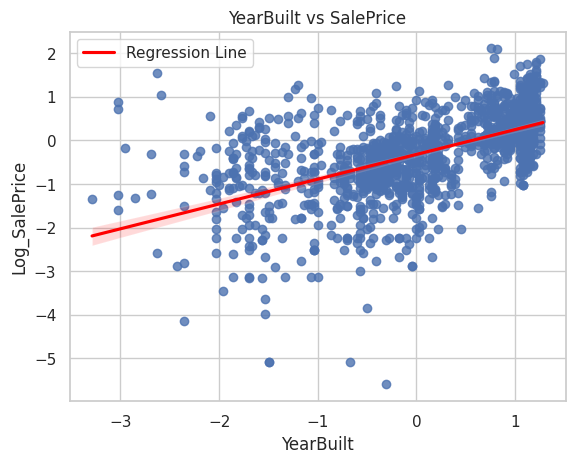

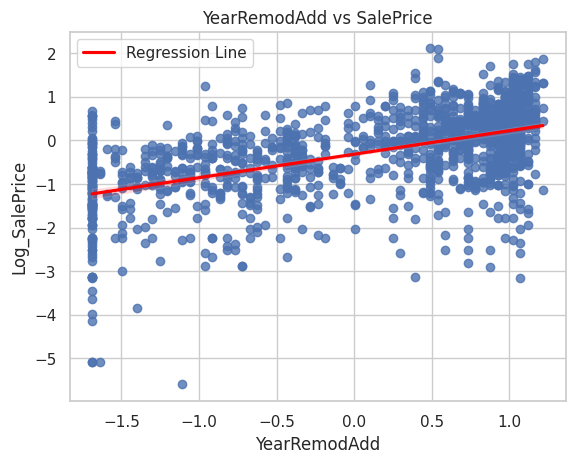

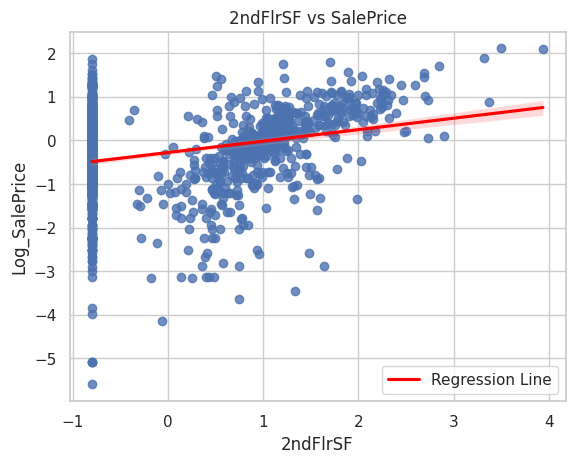

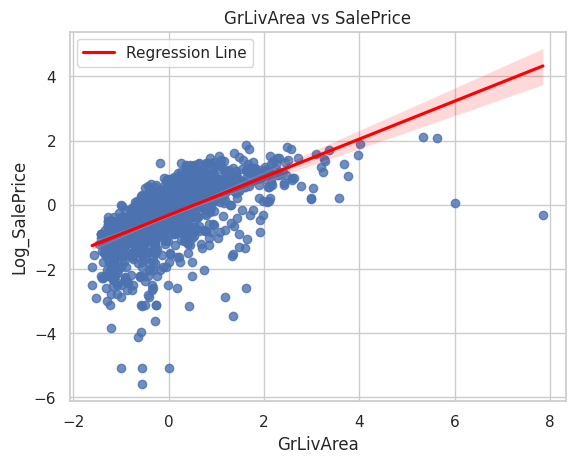

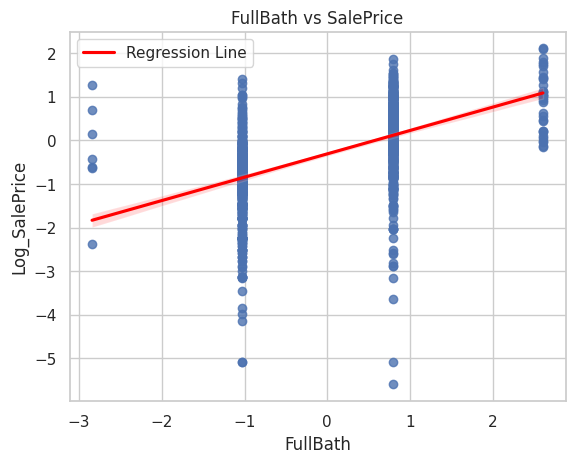

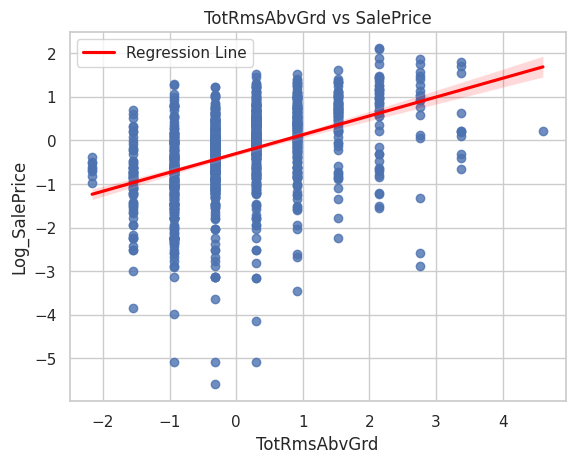

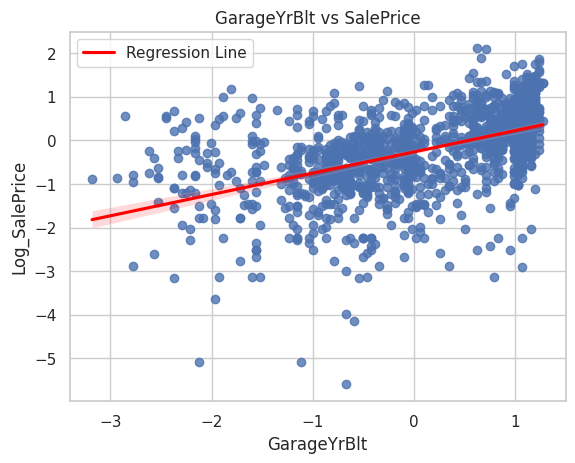

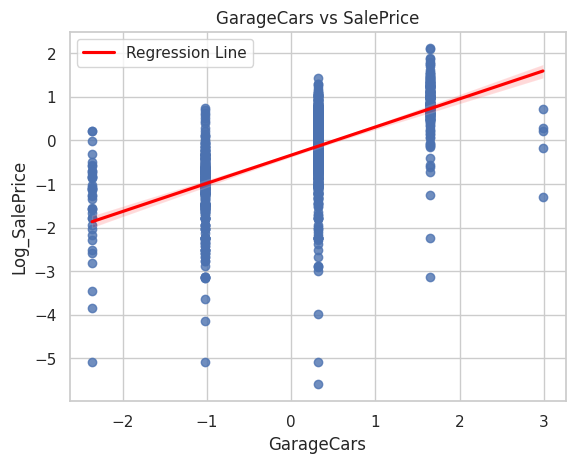

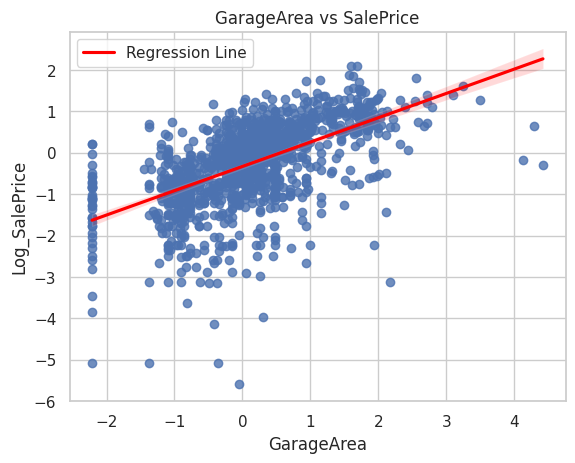

In [26]:
# Check linearlity of each feature
for feature in features:
    sns.regplot(x=df[feature], y=df["Log_SalePrice"], data=df, line_kws={'color': 'red', 'label': "Regression Line"})
    plt.legend()
    plt.title(f"{feature} vs SalePrice")
    plt.show()

In [27]:
# Fill missing values for train set
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)
df['Log_SalePrice'].fillna(df['Log_SalePrice'].mean(), inplace=True)

/tmp/ipykernel_18/3510759694.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)
/tmp/ipykernel_18/3510759694.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [28]:
df.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
Log_SalePrice      0
dtype: int64

In [29]:
# Handling the missing values for test set
test = test_data
test_num = test.select_dtypes("number")
test_cat = test.select_dtypes("object")


scaler = StandardScaler()
scaled_test = scaler.fit_transform(test_num)
df_test = pd.DataFrame(scaled_test, columns=test_num.columns)

In [30]:
df_test[features].isna().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
2ndFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageYrBlt     78
GarageCars       1
GarageArea       1
dtype: int64

In [31]:
df_test['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)
df_test['GarageCars'].fillna(df['Log_SalePrice'].mean(), inplace=True)
df_test['GarageArea'].fillna(df['Log_SalePrice'].mean(), inplace=True)

/tmp/ipykernel_18/2983318223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)
/tmp/ipykernel_18/2983318223.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [32]:
# Starting the linear regression
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Also starting the lasso regression and ridge regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Set the hyperparameters to search
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
param_grid_lasso = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Ridge regression
ridge = Ridge()
ridge_search = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y_train)
best_ridge = ridge_search.best_estimator_
print("Best Ridge parameters:", ridge_search.best_params_)

# Lasso regression
lasso = Lasso()
lasso_search = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y_train)
best_lasso = lasso_search.best_estimator_
print("Best Lasso parameters:", lasso_search.best_params_)


Best Ridge parameters: {'alpha': 100.0}
Best Lasso parameters: {'alpha': 0.1}


In [34]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the best Ridge model
ridge_best = Ridge(alpha=100.0)
ridge_best.fit(X_train, y_train)
y_train_pred_ridge = ridge_best.predict(X_train)
y_test_pred_ridge = ridge_best.predict(X_test)

# Train the best Lasso model
lasso_best = Lasso(alpha=0.1)
lasso_best.fit(X_train, y_train)
y_train_pred_lasso = lasso_best.predict(X_train)

 # Calculate RMSE
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))


train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))


print("Best Ridge Train RMSE:", train_rmse_ridge)
print("Best Lasso Train RMSE:", train_rmse_lasso)

Best Ridge Train RMSE: 0.5950629129301547
Best Lasso Train RMSE: 0.6117184069245714


In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

In [36]:
y_test_pred_ridge = ridge_best.predict(X_test)
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
print("Best Ridge Test RMSE:", test_rmse_ridge)

Best Ridge Test RMSE: 0.7346782563446075


In [37]:
y_test_pred_lasso = lasso_best.predict(X_test)
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
print("Best Lasso Test RMSE:", test_rmse_lasso)

Best Lasso Test RMSE: 0.7583689369697454


In [38]:
# Output results
print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean()}")

Cross-Validation RMSE Scores: [0.51952968 0.63593327 0.68248361 0.5876785  0.58643413]
Mean CV RMSE: 0.6024118378312666


In [39]:
# Extract and standardize the features in the test dataset
X_real_test = df_test[features]

In [40]:
X_real_test

,OverallQual,YearBuilt,YearRemodAdd,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
0,-0.751101,-0.340945,-1.072885,-0.775254,-1.215588,-1.028720,-0.918335,-6.328615e-01,-0.987674,1.185538
1,-0.054877,-0.439695,-1.214908,-0.775254,-0.323539,-1.028720,-0.255371,-7.464050e-01,-0.987674,-0.740959
2,-0.751101,0.844059,0.678742,0.891944,0.294508,0.773083,-0.255371,7.296599e-01,0.301519,0.042545
3,-0.054877,0.876976,0.678742,0.837243,0.243004,0.773083,0.407593,7.675077e-01,0.301519,-0.012761
4,1.337571,0.679475,0.394694,-0.775254,-0.424487,0.773083,-0.918335,5.404208e-01,0.301519,0.153157
...,...,...,...,...,...,...,...,...,...,...
1454,-1.447325,-0.044694,-0.646813,0.523306,-0.811797,-1.028720,-0.918335,4.060070e-15,-2.276867,-2.178918
1455,-1.447325,-0.044694,-0.646813,0.523306,-0.811797,-1.028720,-0.255371,-2.922312e-01,-0.987674,-0.860788
1456,-0.751101,-0.373861,0.584059,-0.775254,-0.539856,-1.028720,0.407593,-6.707093e-01,0.301519,0.475776
1457,-0.751101,0.679475,0.394694,-0.775254,-1.063136,-1.028720,-0.255371,4.060070e-15,-2.276867,-2.178918


In [41]:
y_real_test_pred = model.predict(X_real_test)

In [42]:
# Not sure if if I should exp to reverse the prediction of sale price, I guess not needed.
# y_pred = np.exp(y_real_test_pred)

In [43]:
mean_y = 180921.195890
std_y = 79442.502883
df_sub = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
df_sub["SalePrice"] = y_real_test_pred * std_y + mean_y
df_sub

,Id,SalePrice
0,1461,89430.421444
1,1462,134757.659897
2,1463,170618.008752
3,1464,180537.295506
4,1465,197468.254592
...,...,...
1454,2915,92920.552317
1455,2916,94710.454963
1456,2917,129404.007861
1457,2918,120338.228852


In [44]:
df_sub.to_csv("submission.csv", index=False)